In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

business_owners_and_charac = pd.read_csv('merged_data.csv')

C:\Users\edsta\AppData\Local\Temp\ipykernel_8672\815395136.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  business_owners_and_charac = pd.read_csv('merged_data.csv')


In [4]:
# Subsetting to the education field
eduaction = business_owners_and_charac[(business_owners_and_charac['CBO_QDESC']== 'O07')]
education_subset = eduaction[['OWNER_RACE_LABEL','OWNCHAR_LABEL','BUSCHAR_LABEL','OWNER_SEX_LABEL','EMP_PCT','PAYANN']]
education_subset['OWNER_RACE_LABEL'] = eduaction['OWNER_RACE_LABEL'].astype(str)
education_subset['OWNCHAR_LABEL'] = eduaction['OWNCHAR_LABEL'].astype(str)


C:\Users\edsta\AppData\Local\Temp\ipykernel_8672\1534683658.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_subset['OWNER_RACE_LABEL'] = eduaction['OWNER_RACE_LABEL'].astype(str)
C:\Users\edsta\AppData\Local\Temp\ipykernel_8672\1534683658.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_subset['OWNCHAR_LABEL'] = eduaction['OWNCHAR_LABEL'].astype(str)


# Creating Salary by Degree Graph

In [5]:

education_pay = education_subset[['OWNCHAR_LABEL', 'PAYANN']]
education_pay = education_pay[(education_pay['PAYANN'] != 0) & (education_pay['OWNCHAR_LABEL'] != 'Total reporting')]
education_pay_group = education_pay.groupby('OWNCHAR_LABEL', as_index=False)[['PAYANN']].median()


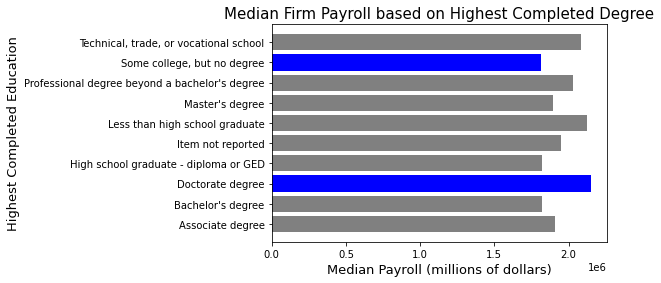

In [169]:
colors = ["blue" if i == 2148582.0 or i ==1816990.0 else "grey" for i in education_pay_group['PAYANN']]
plt.barh(y=education_pay_group['OWNCHAR_LABEL'], width=education_pay_group['PAYANN'], color=colors)
plt.xlabel('Median Payroll (millions of dollars)', fontsize=13)
plt.ylabel('Highest Completed Education', fontsize=13)
plt.title('Median Firm Payroll based on Highest Completed Degree', fontsize=15)
plt.savefig('Median_Salary_by_all_degrees.png', bbox_inches ="tight")


# Creating Percent Owners with education by Race
#### (Some College, but no degree)

In [143]:
education_subset['Count'] = 1
education_subset_somecollege = education_subset[(education_subset.OWNCHAR_LABEL == "Some college, but no degree")]
education_subset_somecollege = education_subset_somecollege[(education_subset.OWNER_RACE_LABEL != 'Nonminority') & (education_subset.OWNER_RACE_LABEL != 'Minority') ]
education_subset_somecollege = education_subset_somecollege.drop('OWNCHAR_LABEL',axis=1)
education_subset_somecollege_grouped_by_race = education_subset_somecollege.groupby(['OWNER_RACE_LABEL'])[['Count']].sum()
education_subset_somecollege_grouped_by_race = education_subset_somecollege_grouped_by_race.drop('All owners of respondent firms',axis=0)

education_subset_somecollege_grouped_by_race['Percent'] = education_subset_somecollege_grouped_by_race['Count'].apply(lambda x: 100*(x/2724))
education_subset_somecollege_grouped_by_race = education_subset_somecollege_grouped_by_race.drop('Count',axis=1)

C:\Users\edsta\AppData\Local\Temp\ipykernel_8672\397175351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_subset['Count'] = 1
C:\Users\edsta\AppData\Local\Temp\ipykernel_8672\397175351.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  education_subset_somecollege = education_subset_somecollege[(education_subset.OWNER_RACE_LABEL != 'Nonminority') & (education_subset.OWNER_RACE_LABEL != 'Minority') ]


# Creating Percent Owners with education by Race
#### (Doctorate degree)


In [132]:
education_subset_doctorate = education_subset[(education_subset.OWNCHAR_LABEL == 'Doctorate degree')]


education_subset_doctorate = education_subset_doctorate[(education_subset.OWNER_RACE_LABEL != 'Nonminority') & (education_subset.OWNER_RACE_LABEL != 'Minority') ]
education_subset_doctorate = education_subset_doctorate.drop('OWNCHAR_LABEL',axis=1)

education_subset_doctorate_grouped_by_race = education_subset_doctorate.groupby(['OWNER_RACE_LABEL'])[['Count']].sum()

education_subset_doctorate_grouped_by_race['Percent'] = education_subset_doctorate_grouped_by_race['Count'].apply(lambda x: 100*(x/2683))
education_subset_doctorate_grouped_by_race = education_subset_doctorate_grouped_by_race.drop('Count',axis=1)
education_subset_doctorate_grouped_by_race = education_subset_doctorate_grouped_by_race.drop('All owners of respondent firms',axis=0)


C:\Users\edsta\AppData\Local\Temp\ipykernel_8672\612250153.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  education_subset_doctorate = education_subset_doctorate[(education_subset.OWNER_RACE_LABEL != 'Nonminority') & (education_subset.OWNER_RACE_LABEL != 'Minority') ]


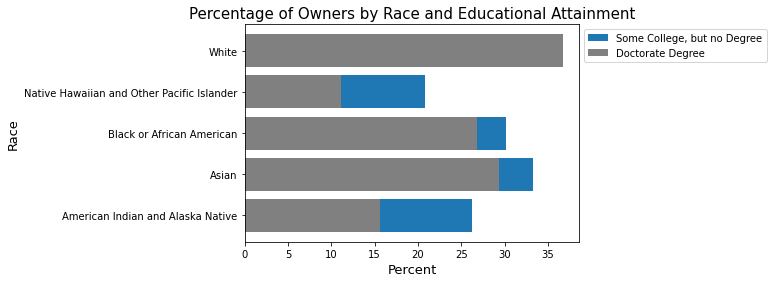

In [213]:


f, ax = plt.subplots()
ax = plt.barh(y=education_subset_somecollege_grouped_by_race.index, width=education_subset_somecollege_grouped_by_race.Percent, label='Some College, but no Degree')
ax = plt.barh(y= education_subset_doctorate_grouped_by_race.index, width=education_subset_doctorate_grouped_by_race.Percent, label='Doctorate Degree', color="Grey" )
plt.title("Percentage of Owners by Race and Educational Attainment", fontsize=15)
plt.xlabel('Percent', fontsize=13)
plt.ylabel('Race', fontsize=13)

plt.legend(bbox_to_anchor=(1,1), 
           loc="upper left")

plt.savefig('Race_education.png', bbox_inches ="tight")

# Creating salary by race and degree
#### (Some college)


In [15]:

education_subset_salary_somecollege = education_subset[(education_subset.OWNCHAR_LABEL == "Some college, but no degree")]


education_subset_salary_somecollege = education_subset_salary_somecollege[(education_subset.OWNER_RACE_LABEL != 'Nonminority') & (education_subset.OWNER_RACE_LABEL != 'Minority') ]
education_subset_salary_somecollege = education_subset_salary_somecollege.drop('OWNCHAR_LABEL',axis=1)
education_subset_salary_somecollege = education_subset_salary_somecollege[(education_subset_salary_somecollege['PAYANN'] != 0) & (education_subset_salary_somecollege['BUSCHAR_LABEL'] != 'Total reporting')]


education_subset_salary_somecollege_grouped_by_race = education_subset_salary_somecollege.groupby(['OWNER_RACE_LABEL'])[['PAYANN']].median()

education_subset_salary_somecollege_grouped_by_race = education_subset_salary_somecollege_grouped_by_race.drop('All owners of respondent firms',axis=0)



C:\Users\edsta\AppData\Local\Temp\ipykernel_8672\3231458596.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  education_subset_salary_somecollege = education_subset_salary_somecollege[(education_subset.OWNER_RACE_LABEL != 'Nonminority') & (education_subset.OWNER_RACE_LABEL != 'Minority') ]


# Creating salary by race and degree
#### (Doctorate)

In [ ]:

education_subset_salary_doctorate = education_subset[(education_subset.OWNCHAR_LABEL == 'Doctorate degree')]


education_subset_salary_doctorate = education_subset_salary_doctorate[(education_subset.OWNER_RACE_LABEL != 'Nonminority') & (education_subset.OWNER_RACE_LABEL != 'Minority') ]
education_subset_salary_doctorate = education_subset_salary_doctorate.drop('OWNCHAR_LABEL',axis=1)
education_subset_salary_doctorate = education_subset_salary_doctorate[(education_subset_salary_doctorate['PAYANN'] != 0) & (education_subset_salary_doctorate['BUSCHAR_LABEL'] != 'Total reporting')]


education_subset_salary_doctorate_grouped_by_race = education_subset_salary_doctorate.groupby(['OWNER_RACE_LABEL'])[['PAYANN']].median()

education_subset_salary_doctorate_grouped_by_race = education_subset_salary_doctorate_grouped_by_race.drop('All owners of respondent firms',axis=0)


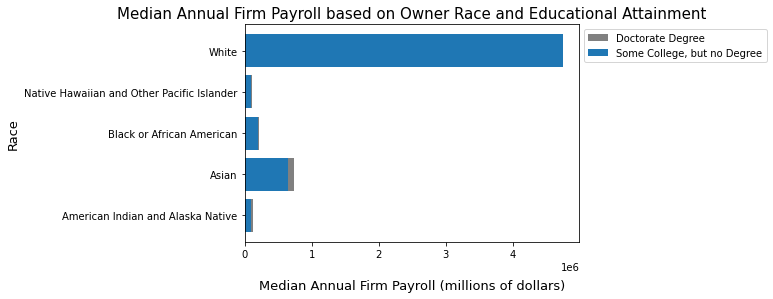

In [222]:


f, ax = plt.subplots()
ax = plt.barh(y= education_subset_salary_doctorate_grouped_by_race.index, width=education_subset_salary_doctorate_grouped_by_race.PAYANN, label='Doctorate Degree', color="Grey" )
ax = plt.barh(y=education_subset_salary_somecollege_grouped_by_race.index, width=education_subset_salary_somecollege_grouped_by_race.PAYANN, label='Some College, but no Degree')
plt.title("Median Annual Firm Payroll based on Owner Race and Educational Attainment", fontsize=15)
plt.xlabel('Median Annual Firm Payroll (millions of dollars)', fontsize=13, labelpad=20)
plt.ylabel('Race', fontsize=13)
plt.legend(bbox_to_anchor=(1,1), 
           loc="upper left")
plt.savefig('payroll_education_race.png', bbox_inches = "tight")

## Types of Workers based on degree

In [157]:
type_of_employees = eduaction[['BUSCHAR_LABEL','EMP_PCT','OWNCHAR_LABEL', 'CB_QDESC_LABEL']]
type_of_employees_doc = type_of_employees[(education_subset.OWNCHAR_LABEL == 'Doctorate degree')]
type_of_employees_doc_only_workers = type_of_employees_doc[(type_of_employees_doc.CB_QDESC_LABEL == 'WORKERS')]
type_of_employees_doc_only_workers_subset = type_of_employees_doc_only_workers[['BUSCHAR_LABEL','EMP_PCT']]
type_of_employees_doc_only_workers_subset = type_of_employees_doc_only_workers_subset[(type_of_employees_doc_only_workers_subset.BUSCHAR_LABEL != 'Leased employees from leasing service or professional employer organization')]
type_of_employees_doc_only_workers_subset_grouped = type_of_employees_doc_only_workers_subset.groupby('BUSCHAR_LABEL')[['EMP_PCT']].median()
type_of_employees_doc_only_workers_subset_grouped.drop(['All firms','Contractors, subcontractors, independent contractors, or outside consultants',
'Item not reported','None of the above','Total reporting'], inplace=True)


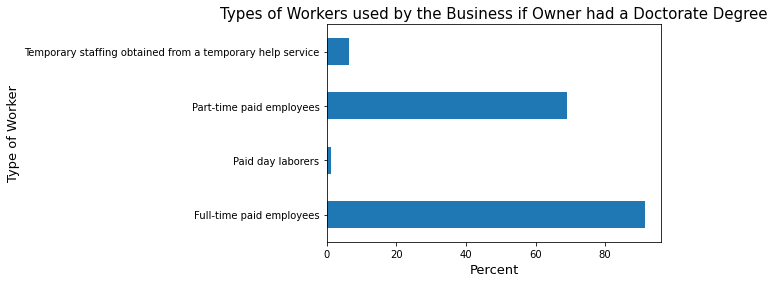

In [225]:

type_of_employees_doc_only_workers_subset_grouped.plot.barh(legend = None)
plt.title('Types of Workers used by the Business if Owner had a Doctorate Degree', fontsize=15)
plt.xlabel('Percent', fontsize=13)
plt.ylabel('Type of Worker', fontsize=13)
plt.savefig('Typeofworker_doctorate.png', bbox_inches = "tight")

In [165]:
type_of_employees_no = eduaction[['BUSCHAR_LABEL','EMP_PCT','OWNCHAR_LABEL', 'CB_QDESC_LABEL']]
type_of_employees_no = type_of_employees_no[(type_of_employees_no.OWNCHAR_LABEL == "Some college, but no degree")]
type_of_employees_no_only_workers = type_of_employees_no[(type_of_employees_no.CB_QDESC_LABEL == 'WORKERS')]
type_of_employees_no_only_workers_subset = type_of_employees_no_only_workers[['BUSCHAR_LABEL','EMP_PCT']]
type_of_employees_no_only_workers_subset = type_of_employees_no_only_workers_subset[(type_of_employees_no_only_workers_subset.BUSCHAR_LABEL != 'Leased employees from leasing service or professional employer organization')]

type_of_employees_no_only_workers_subset_grouped = type_of_employees_no_only_workers_subset.groupby('BUSCHAR_LABEL')['EMP_PCT'].median()
type_of_employees_no_only_workers_subset_grouped.drop(['All firms','Contractors, subcontractors, independent contractors, or outside consultants',
'Item not reported','None of the above','Total reporting'], inplace=True)



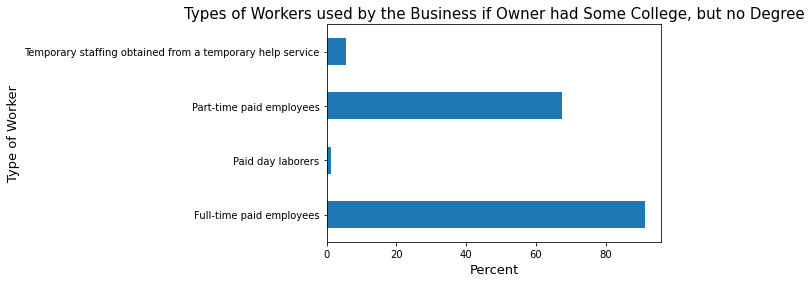

In [226]:
type_of_employees_no_only_workers_subset_grouped.plot.barh(legend=None)
plt.title('Types of Workers used by the Business if Owner had Some College, but no Degree', fontsize=15)
plt.xlabel('Percent', fontsize=13)
plt.ylabel('Type of Worker', fontsize=13)
plt.savefig('Typeofworker_somecollege.png', bbox_inches = "tight")
